# 모두를 위한 딥러닝 : Pytorch
## Lecture 11-3 - RNN LongSeq
----
본 문서는 모두를 위한 딥러닝 강의를 듣고 공부 목적으로 작성되었습니다.  

 우리가 그동안 봐온 rnn 예제들은 간단한 문장들이었다. 하지만 실제 문장들은 길이가 더 길다. 하지만 긴 문장을 하나의 input으로 사용할 수는 없기 때문에, 긴 문장을 나누어서 사용하여야 한다. 따라서, 일정한 사이즈의 윈도우를 사용하여, 잘라준 후 input으로 사용하여야 한다.
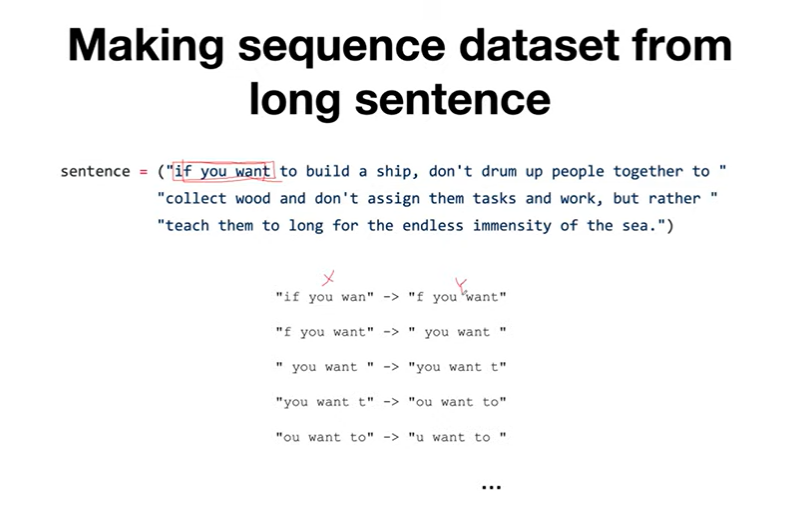

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [4]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [5]:
char_set = list(set(sentence))
char_dic = {c : i for i,c in enumerate(char_set)}

In [6]:
dic_size = len(char_dic)
hidden_size = len(char_dic)
sequence_length = 10
lr = 0.1

윈도우의 사이즈를 10으로 설정하였다.

In [19]:
x_data = []
y_data = []

for i in range(len(sentence)-sequence_length):
    x_char = sentence[i:i+sequence_length]
    y_char = sentence[i+1:i+1+sequence_length]

    x_vec = [char_dic[c] for c in x_char]
    y_vec = [char_dic[c] for c in y_char]

    x_data.append(x_vec)
    y_data.append(y_vec)

x_one_hot = [np.eye(dic_size)[x] for x in x_data]
print(x_one_hot)

[array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,

AttributeError: 'list' object has no attribute 'size'

In [20]:
X = torch.FloatTensor(x_one_hot)
Y = torch.LongTensor(y_data)
print(X.shape)
print(Y.shape)

torch.Size([170, 10, 25])
torch.Size([170, 10])


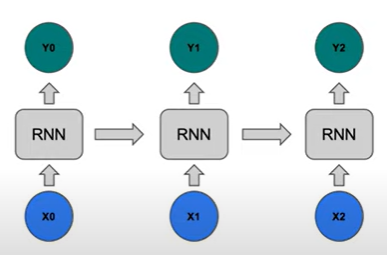  
  
  우리는 지금까지 하나의 셀만 있는 rnn에 대해 다루어왔다.하지만 모델이 데이터에 underfitting이 될 때는 모델의 크기를 늘리고 싶을 수도 있다. 그래서,이번 시간에는, RNN셀을 stacking하고 fc layer를 추가하는 모델을 만들어줄 것이다.  
  
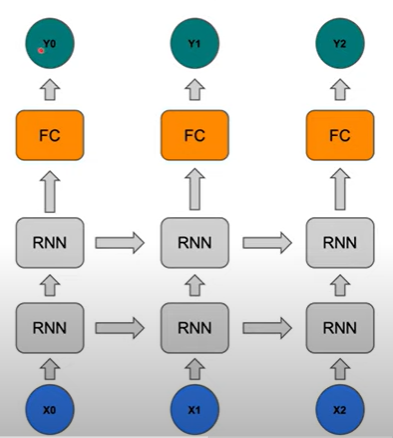

In [28]:
class Rnn(nn.Module):
    def __init__(self, input_dim, hidden_dim, layers):
        super(Rnn, self).__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first = True)
        self.fc = nn.Linear(hidden_dim, hidden_dim,bias=True)
    
    def forward(self, x):
        x,_status = self.rnn(x)
        x = self.fc(x)
        return x
    
net = Rnn(dic_size, hidden_size, 2)

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

In [30]:
# start training
for i in range(500):
    optimizer.zero_grad()
    outputs = net(X)
    loss = criterion(outputs.view(-1, dic_size), Y.view(-1))
    loss.backward()
    optimizer.step()

    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        # print(i, j, ''.join([char_set[t] for t in result]), loss.item())
        if j == 0:
            predict_str += ''.join([char_set[t] for t in result])
        else:
            predict_str += char_set[result[-1]]

    print(predict_str)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,, ,,,, ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,, ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,, ,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,, ,,,,,,,,,,, ,,
                                                                                                                                                                                   
tosotosletttottooottootttsottstttottttttottottttttoottotttoottottttottotottottsotttsottttottostttottottttttotttssttstttttttttttstttttttottsttttottsotttstttstttotttttttsottttotttst
 et et et tttttot et et ettett etteot tt ot tttttttt tteet ot ot et ot tt ettt ttetteot ot ete ot tttt otttttett etttttot otetett ot et tttt tt ot teettettt etttttetttt ot tt ett 
  r u    o     ooou ou o e o  uoo u ou o ouoo  o  tou   u o u o uu  ut o tt ouoo ou u ou e o eu o o o uo o oo   u ooo o      u o u      o o tu ou o er   u   ouoer o  o ou t eu o t
  c  l  orl   c  l    o ec           c              c  ec   rl  l    l  cl o l     ol        ec   rl

맨 앞의 글자가 학습이 잘 되지 않았지만, 대체로 학습이 잘 진행된 것을 확인할 수 있다. 이는 이전 cell에서 받은 정보가 많지 않기 때문일 것이다.